### News Mood Sentiment Analysis

#### By: Naser Erwemi

https://www.linkedin.com/in/aerwemi/

https://github.com/aerwemi

## Background

__Twitter__ has become a wildly sprawling jungle of information&mdash;140 characters at a time. Somewhere between 350 million and 500 million tweets are estimated to be sent out _per day_. With such an explosion of data, on Twitter and elsewhere, it becomes more important than ever to tame it in some way, to concisely capture the essence of the data.

## News Mood

A python script to perform sentiment analysis of the Twitter activity of various news outlets, and to present your findings visually.

Your final output should provide a visualized summary of the sentiments expressed in Tweets sent out by the following news organizations: __BBC, CBS, CNN, Fox, New York Times and 
The Washington Post__.



The first plot will be and/or feature the following:

* Be a scatter plot of sentiments of the last __100__ tweets sent out by each news organization, ranging from -1.0 to 1.0, where a score of 0 expresses a neutral sentiment, -1 the most negative sentiment possible, and +1 the most positive sentiment possible.
* Each plot point will reflect the _compound_ sentiment of a tweet.
* Sort each plot point by its relative timestamp.

The second plot will be a bar plot visualizing the _overall_ sentiments of the last 100 tweets from each organization. For this plot, you will again aggregate the compound sentiments analyzed by VADER.

The tools of the trade you will need for your task as a data analyst include the following: tweepy, pandas, matplotlib, seaborn, textblob, and VADER.

Included analysis:

* Pull last 100 tweets from each outlet.
* Sentiment analysis with the compound, positive, neutral, and negative scoring for each tweet. 
* A DataFrame the tweet's source account, its text, its date, and its compound, positive, neutral, and negative sentiment scores.
* DataFrame into a CSV file.
* PNG images for each plot.

# Studay Summary and Conclusions


BBC and CBS has much fewer tweets and followers than other outlets.

BBC and CBS tweets are more positive than other outlets. Tweets normally distributed for most of the news outlets with most of the tweets are neutral scores.

BBC and CBS have similar polarity distribution. 

CNN, Fox, New York Times and The Washington Post have similar polarity distribution. 

CNN, Fox, NY time and WP are more negative than BBC can CBS with distribution slightly skewed to the negative side. 

Time series analysis may help understand the frequency of tweets Where BBC and CBS tweets less than other outlets. 


In [2]:
import tweepy
import json
import pandas  as pd
import numpy   as np
import seaborn as sns
import time 
import matplotlib.pyplot as plt
from   datetime import datetime
from   config   import consumer_key, consumer_secret, access_token, access_token_secret

# Import and Initialize Sentiment Analyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [3]:
print(analyzer.polarity_scores('This is EXCELLENT'))
print(analyzer.polarity_scores('This is Excellent'))

print(analyzer.polarity_scores('This is NOT good'))
print(analyzer.polarity_scores('This is not good'))

{'neg': 0.0, 'neu': 0.311, 'pos': 0.689, 'compound': 0.6633}
{'neg': 0.0, 'neu': 0.351, 'pos': 0.649, 'compound': 0.5719}
{'neg': 0.0, 'neu': 0.508, 'pos': 0.492, 'compound': 0.4404}
{'neg': 0.445, 'neu': 0.555, 'pos': 0.0, 'compound': -0.3412}


In [4]:
# Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [5]:
#list of the news outlet - on Tweeter 

#news_outlets=['CNN', 'FoxNews' , 'nytimes', 'washingtonpost'] # added WP as it is simlar to nytimes
news_outlets=['BBC', 'CBS', 'CNN', 'FoxNews' , 'nytimes', 'washingtonpost']

In [6]:
news_outletL=[]
for news_outlet in news_outlets:
    
    try:
        user_account = api.get_user(news_outlet)

        thesNewsOutlet={
            "News_outlet"      :  user_account["name"]           ,
            "Tweets"           :  user_account["statuses_count"] ,
            "Followers"        :  user_account["followers_count"],
            "Following"        :  user_account["friends_count"]  ,
            "Favorites Count"  :  user_account["favourites_count"]
        }


        news_outletL.append(thesNewsOutlet)
        
        
    except tweepy.TweepError as e:
        print(e)
    
popular_news = pd.DataFrame(news_outletL)
popular_news.set_index('News_outlet', inplace=True)
popular_news

,Favorites Count,Followers,Following,Tweets
News_outlet,,,,
BBC,3601,1399999,182,25783
CBS,1974,993420,502,16793
CNN,1460,39992058,1115,193973
Fox News,0,17787982,408,397301
The New York Times,17143,41608914,887,327457
Washington Post,4494,12598119,1490,277770


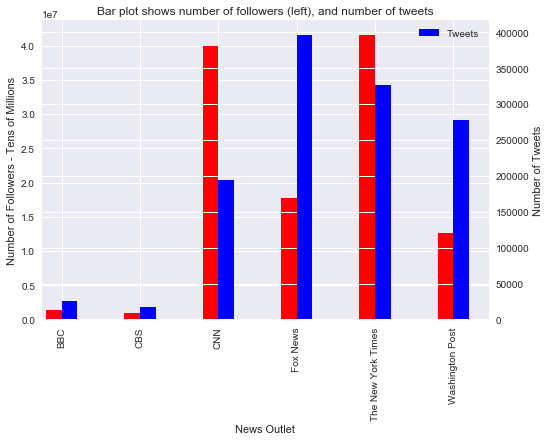

In [10]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax2 = ax.twinx()

width = 0.2

popular_news['Followers'].plot(kind='bar', color='red', ax=ax, width=width, position=1)
popular_news['Tweets'].plot(kind='bar', color='blue', ax=ax2, width=width, position=0)

ax.set_ylabel('Number of Followers - Tens of Millions')
ax2.set_ylabel('Number of Tweets')
ax.set_xlabel('News Outlet')

plt.title('Bar plot shows number of followers (left), and number of tweets')
plt.legend()

plt.savefig('Bar plot_number followers_tweets')
plt.show()

In [33]:
for i in range(1,15):
    print(i)

1
2
3
4
5
6
7
8
9
10
11
12
13
14


In [8]:
# Target User
news_outlets=['CNN', 'FoxNews' , 'nytimes', 'washingtonpost']
#news_outlets=['BBC', 'CBS', 'CNN', 'FoxNews' , 'nytimes', 'washingtonpost']


#Create Dir to hold extracted data 
sentement_scoresL=[]

for news_outlet in news_outlets:
    # Create a loop to iteratively run API requests
    
    num=0
    for tweet_page in range(1,3):

        # Get all tweets from home feed (for each page specified)
        public_tweets = api.user_timeline(news_outlet, page=tweet_page)

        # Loop through all tweets
        for tweet in public_tweets:


            # tweet Number 
            num+=1
            
            Compound = analyzer.polarity_scores(tweet["text"])['compound']
            Negative = analyzer.polarity_scores(tweet["text"])['neg']
            Positive = analyzer.polarity_scores(tweet["text"])['pos']
            Neutral  = analyzer.polarity_scores(tweet["text"])['neu']
            
            
            
            
            
            thisTweet={
                
                "Tweet_number"   :  num                   ,
                "News_outlet"    :  tweet['user']['name'] ,
                "Date"           :  tweet['created_at']   ,
                "Tweet"          :  tweet["text"]         ,
                "Compound"       :  Compound              ,
                "Negative"       :  Negative              ,
                "Neutral"        :  Neutral               ,
                "Positive"       :  Positive              ,
                "Source"         :  tweet["source"]
                
            }
            sentement_scoresL.append(thisTweet)
            time.sleep(2)
            
    time.sleep(5)
news_outlets_sentements = pd.DataFrame(sentement_scoresL)
news_outlets_sentements.head()

,Compound,Date,Negative,Neutral,News_outlet,Positive,Source,Tweet,Tweet_number
0,0.0000,Mon Jul 23 20:33:27 +0000 2018,0.000,1.000,CNN,0.000,"<a href=""http://www.socialflow.com"" rel=""nofol...",This week's blood Moon will be the longest tot...,1
1,0.1280,Mon Jul 23 20:25:13 +0000 2018,0.000,0.927,CNN,0.073,"<a href=""http://www.socialflow.com"" rel=""nofol...",Migrant women waiting to be reunited with thei...,2
2,0.0000,Mon Jul 23 20:22:08 +0000 2018,0.000,1.000,CNN,0.000,"<a href=""https://about.twitter.com/products/tw...","RT @TheLeadCNN: @jaketapper By the way, former...",3
3,-0.1531,Mon Jul 23 20:21:29 +0000 2018,0.153,0.721,CNN,0.126,"<a href=""https://about.twitter.com/products/tw...",RT @TheLeadCNN: .@jaketapper: The President of...,4
4,-0.2960,Mon Jul 23 20:21:19 +0000 2018,0.099,0.901,CNN,0.000,"<a href=""http://www.socialflow.com"" rel=""nofol...","Maria Butina, who is accused by US prosecutors...",5


In [9]:
news_outlets_sentements.groupby(['Source', 'News_outlet']).agg({'Tweet': "count"})

Tweet
Source                                             News_outlet              
<a href="http://twitter.com" rel="nofollow">Twi... CNN                     1
                                                   Fox News               14
                                                   The New York Times      3
<a href="http://www.socialflow.com" rel="nofoll... CNN                    28
                                                   The New York Times     37
                                                   Washington Post        33
<a href="http://www.washingtonpost.com" rel="no... Washington Post         1
<a href="https://about.twitter.com/products/twe... CNN                     3
                                                   Fox News               13
                                                   Washington Post         6
<a href="https://studio.twitter.com" rel="nofol... CNN                     8
                                                   Fox News               13

In [10]:
# Working with the Dates 
raw_date=news_outlets_sentements['Date'].tolist()
dates=[datetime.strptime(raw_stamp, "%a %b %d %H:%M:%S %z %Y") for raw_stamp in raw_date]
dates_array=np.asarray(dates)
#pd.Series(test3)
news_outlets_sentements.insert(0, 'Date_time', dates_array)

In [11]:
#drop old raw date 
news_outlets_sentements.drop('Date', axis=1, inplace=True)

#QC Step 
news_outlets_sentements.head() # check data - should have all the outles . head  

,Date_time,Compound,Negative,Neutral,News_outlet,Positive,Source,Tweet,Tweet_number
0,2018-07-23 20:33:27+00:00,0.0000,0.000,1.000,CNN,0.000,"<a href=""http://www.socialflow.com"" rel=""nofol...",This week's blood Moon will be the longest tot...,1
1,2018-07-23 20:25:13+00:00,0.1280,0.000,0.927,CNN,0.073,"<a href=""http://www.socialflow.com"" rel=""nofol...",Migrant women waiting to be reunited with thei...,2
2,2018-07-23 20:22:08+00:00,0.0000,0.000,1.000,CNN,0.000,"<a href=""https://about.twitter.com/products/tw...","RT @TheLeadCNN: @jaketapper By the way, former...",3
3,2018-07-23 20:21:29+00:00,-0.1531,0.153,0.721,CNN,0.126,"<a href=""https://about.twitter.com/products/tw...",RT @TheLeadCNN: .@jaketapper: The President of...,4
4,2018-07-23 20:21:19+00:00,-0.2960,0.099,0.901,CNN,0.000,"<a href=""http://www.socialflow.com"" rel=""nofol...","Maria Butina, who is accused by US prosecutors...",5


In [12]:
#QC Step 
news_outlets_sentements.tail() # check data - should have all the outles . tail for last news outlet  

,Date_time,Compound,Negative,Neutral,News_outlet,Positive,Source,Tweet,Tweet_number
155,2018-07-23 16:51:47+00:00,0.0000,0.000,1.000,Washington Post,0.000,"<a href=""http://www.socialflow.com"" rel=""nofol...",Two former Michelle Obama staffers tie the kno...,36
156,2018-07-23 16:44:23+00:00,0.0000,0.000,1.000,Washington Post,0.000,"<a href=""http://www.socialflow.com"" rel=""nofol...","""Ozy Fest is cheaper and more interactive than...",37
157,2018-07-23 16:40:23+00:00,0.6369,0.000,0.819,Washington Post,0.181,"<a href=""https://about.twitter.com/products/tw...",Comments the department’s Freedom of Informati...,38
158,2018-07-23 16:33:02+00:00,-0.5719,0.316,0.684,Washington Post,0.000,"<a href=""http://www.socialflow.com"" rel=""nofol...",Opinion: Hunters should hate this proposed pro...,39
159,2018-07-23 16:31:39+00:00,0.0000,0.000,1.000,Washington Post,0.000,"<a href=""https://about.twitter.com/products/tw...","In a quest to shrink national monuments, Inter...",40


In [13]:
# QC step 
news_outlets_sentements.shape # should have number of rows - for this case study 600 

(160, 9)

In [14]:
# QC step 
news_outlets = set(news_outlets_sentements['News_outlet'].tolist()) # check if all outlets are extracted and yes 6 of them
news_outlets

{'CNN', 'Fox News', 'The New York Times', 'Washington Post'}

In [15]:
news_outlets_sentements.to_csv('news_outlets_sentements.csv')

In [16]:
# dates for disply 
dates=news_outlets_sentements.Date_time.sort_values()
date_1st=dates.iloc[0]
date_end=dates.iloc[-1]
date_1st

Timestamp('2018-07-23 14:36:28+0000', tz='UTC')

In [17]:
date_start=f'{date_1st.month}/{date_1st.day}/{date_1st.year} {date_1st.hour}:{date_1st.minute}'
date_start

'7/23/2018 14:36'

In [18]:
date_end=f'{date_end.month}/{date_end.day}/{date_end.year} {date_end.hour}:{date_end.minute}'
date_end

'7/23/2018 20:42'

In [19]:
compund=news_outlets_sentements.pivot(index='Tweet_number', columns='News_outlet', values='Compound')
compund.head()

News_outlet,CNN,Fox News,The New York Times,Washington Post
Tweet_number,,,,
1,0.0000,-0.8625,0.7783,-0.4939
2,0.1280,0.2577,0.7579,-0.2960
3,0.0000,-0.6597,-0.4588,0.6124
4,-0.1531,0.4019,0.0000,0.0000
5,-0.2960,0.0000,0.4939,0.4588


##  Sentiment Polarity Analysis of each news_outlet

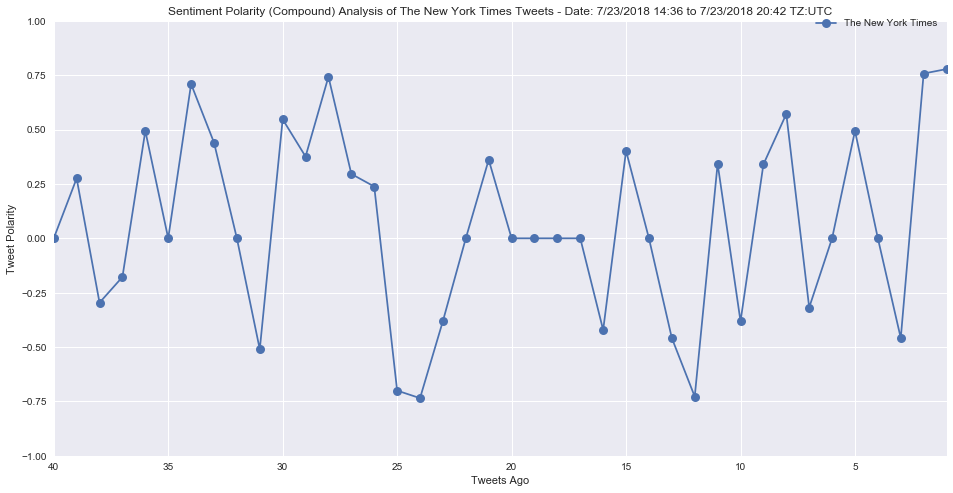

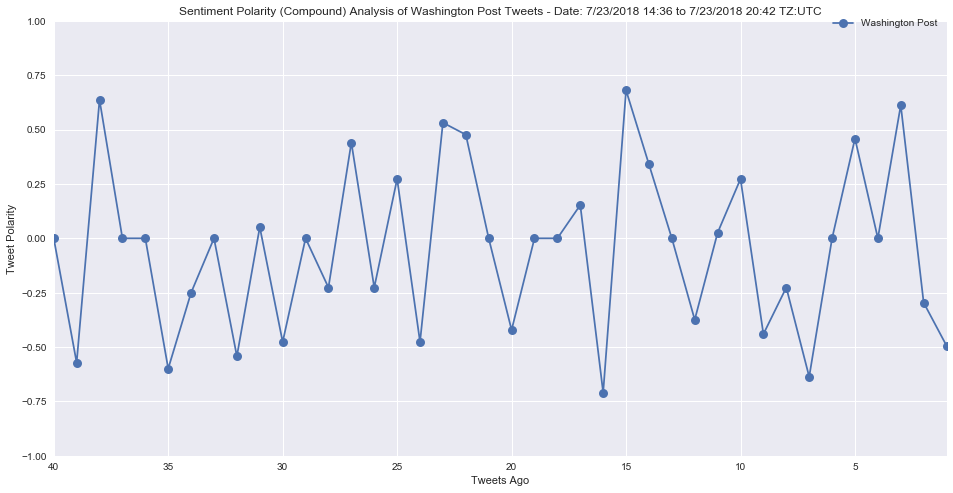

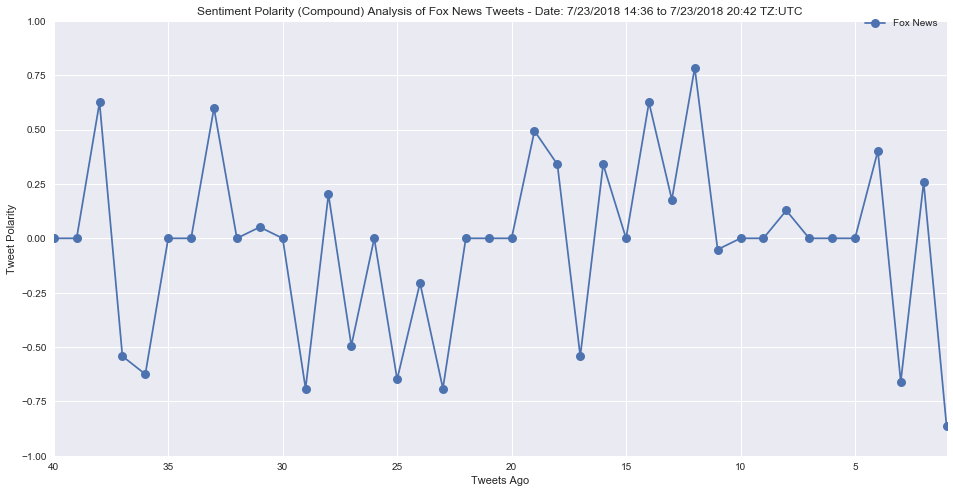

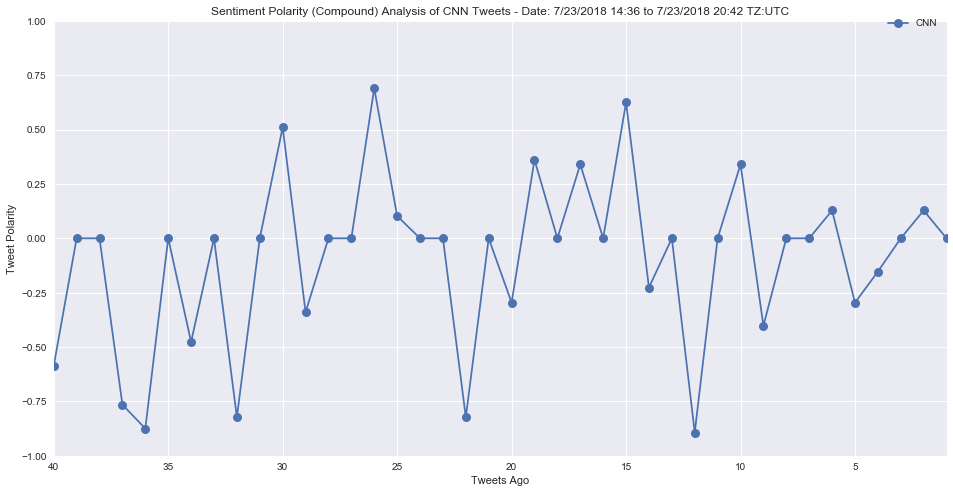

In [20]:

for news_outlet in news_outlets:
    compund[news_outlet].sort_index(ascending=False).plot(marker = 'o', grid=True,style='-', ms=9, figsize=(16,8))
    plt.legend(bbox_to_anchor=(1, 1.025))
    plt.xlabel('Tweets Ago')
    plt.ylabel('Tweet Polarity')
    plt.title(f'Sentiment Polarity (Compound) Analysis of {news_outlet} Tweets - Date: {date_start} to {date_end} TZ:UTC')
    plt.ylim(-1,1)
    plt.savefig(f'Sentiment Polarity Analysis {news_outlet}')

    plt.show();

##  Sentiment Polarity Analysis of all news_outlet

In [21]:
compund.min(), compund.max()

(News_outlet
 CNN                  -0.8932
 Fox News             -0.8625
 The New York Times   -0.7351
 Washington Post      -0.7096
 dtype: float64, News_outlet
 CNN                   0.6901
 Fox News              0.7845
 The New York Times    0.7783
 Washington Post       0.6808
 dtype: float64)

In [22]:
compundP = compund[(compund > .55) | (compund <-.55)]

In [23]:
compundP

News_outlet,CNN,Fox News,The New York Times,Washington Post
Tweet_number,,,,
1,NaN,-0.8625,0.7783,NaN
2,NaN,NaN,0.7579,NaN
3,NaN,-0.6597,NaN,0.6124
4,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,-0.6369
8,NaN,NaN,0.5719,NaN
9,NaN,NaN,NaN,NaN


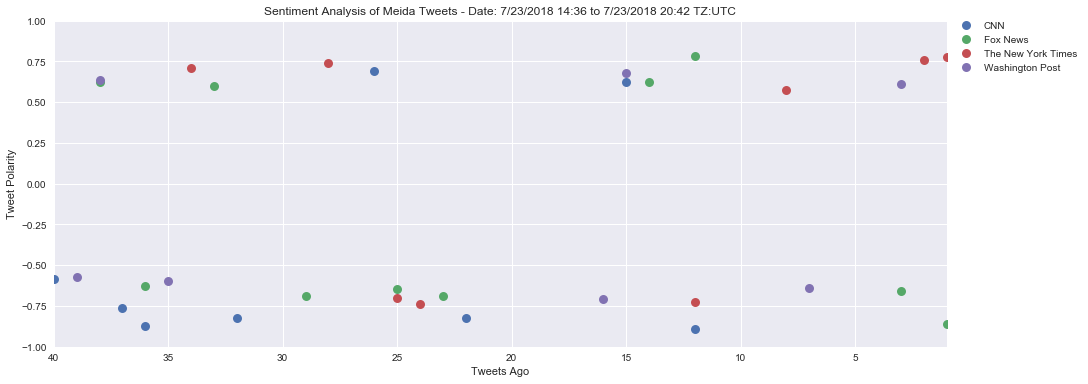

In [24]:
compundP.sort_index(ascending=False).plot(marker = 'o', grid=True,style=' ', ms=9, figsize=(16,6))
plt.legend(bbox_to_anchor=(1, 1.025))
plt.xlabel('Tweets Ago')
plt.ylabel('Tweet Polarity')
plt.title(f'Sentiment Analysis of Meida Tweets - Date: {date_start} to {date_end} TZ:UTC')
plt.ylim(-1,1)
plt.savefig('Sentiment Polarity Analysis all news outlets')
plt.show();

##  Sentiment Polarity Analysis of all news_outlet Bar plot ( mean) and Swarmplot 

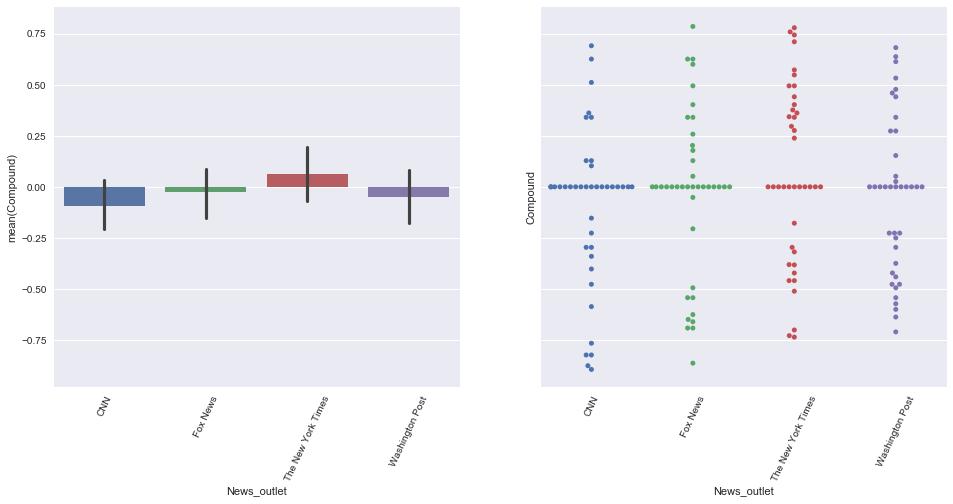

In [25]:
fig, axs = plt.subplots(ncols=2, figsize=(16,7), sharey=True)

a=sns.barplot(x='News_outlet', y='Compound', data=news_outlets_sentements, ax=axs[0])
for item in a.get_xticklabels():
    item.set_rotation(65)
b=sns.swarmplot(x='News_outlet', y='Compound', data=news_outlets_sentements, ax=axs[1])
for item in b.get_xticklabels():
    item.set_rotation(65)
plt.savefig('Bar Plots  - Swarm plot for Compound score')
plt.show()

## Kernel density estimaton - distribution of news outlets - compound score
Helps understand the data disputation
 

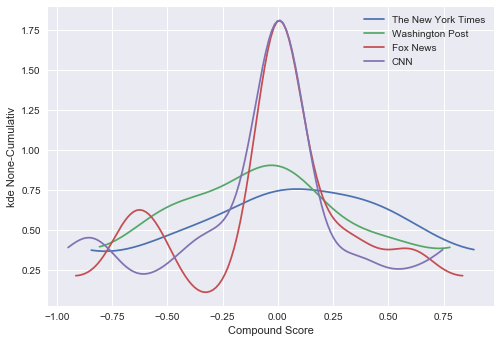

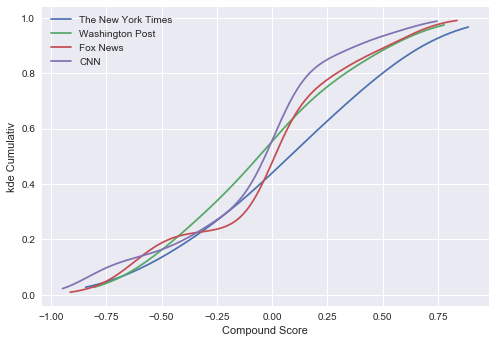

In [26]:
# create a histogram. By default it adds the kde (kernel density estimate)
for i in news_outlets:
    sns.kdeplot(compund[i], shade=False, cut=0.5, cumulative=False)
plt.xlabel('Compound Score')
plt.ylabel('kde None-Cumulativ')
plt.savefig('Kernel density estimaton')
plt.show()


# create a histogram. By default it adds the kde (kernel density estimate)
for i in news_outlets:
    sns.kdeplot(compund[i], shade=False, cut=0.5, cumulative=True)
plt.xlabel('Compound Score')
plt.ylabel('kde Cumulativ')
plt.savefig('Kernel density estimaton Cumulativ')
plt.show()

## Bar plot ( mean) Positive, Neutral and Negative sentements


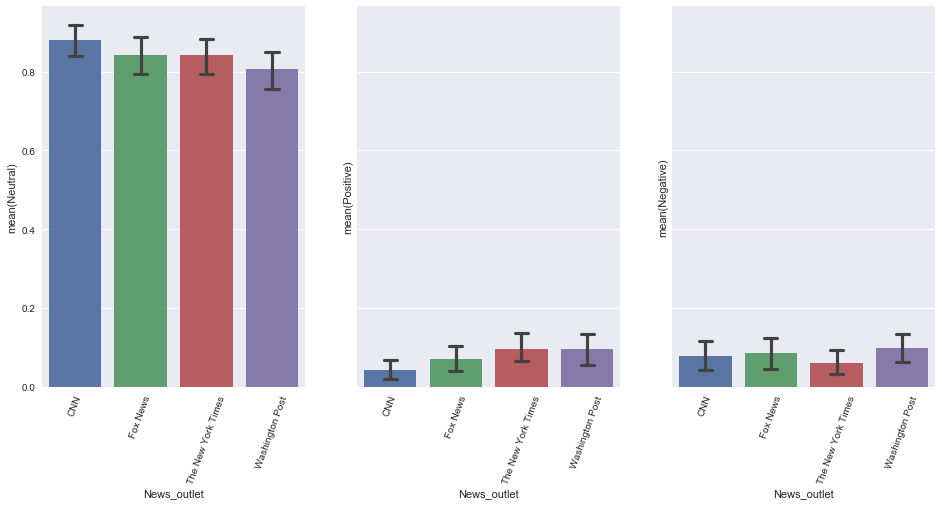

In [27]:
fig, axs = plt.subplots(ncols=3, figsize=(16,7), sharey=True)

a=sns.barplot(x='News_outlet', y='Neutral', data=news_outlets_sentements, ax=axs[0], capsize=.2)
for item in a.get_xticklabels():
    item.set_rotation(70)

b=sns.barplot(x='News_outlet', y='Positive', data=news_outlets_sentements, ax=axs[1] , capsize=.2)
for item in b.get_xticklabels():
    item.set_rotation(70)
    
c=sns.barplot(x='News_outlet', y='Negative', data=news_outlets_sentements, ax=axs[2], capsize=.2)
for item in c.get_xticklabels():
    item.set_rotation(70)
    
plt.savefig('Bar Plots All News Outlets')

plt.show()

## Sentiment score vs. Time Series plots  

In [28]:
def plot_time_scores(score):
    fig = plt.figure(figsize=(16,7))
    ax = fig.add_subplot(1, 1, 1)

    markers=['bo', 'go', 'ro', 'co', 'mo', 'ko']
    
    counter=0

    for news_outlet in news_outlets:
        data = news_outlets_sentements[news_outlets_sentements['News_outlet']==news_outlet]
        ax.plot(data.Date_time, data[score], markers[counter], label=news_outlet)
        counter+=1

    ax.legend()
    plt.title(f'Time vs Sentiment score ({score})')
    plt.xlabel('Time')
    plt.ylabel(f'{score} score')
    plt.savefig(f'timeS_Plots {score}')
    plt.show()

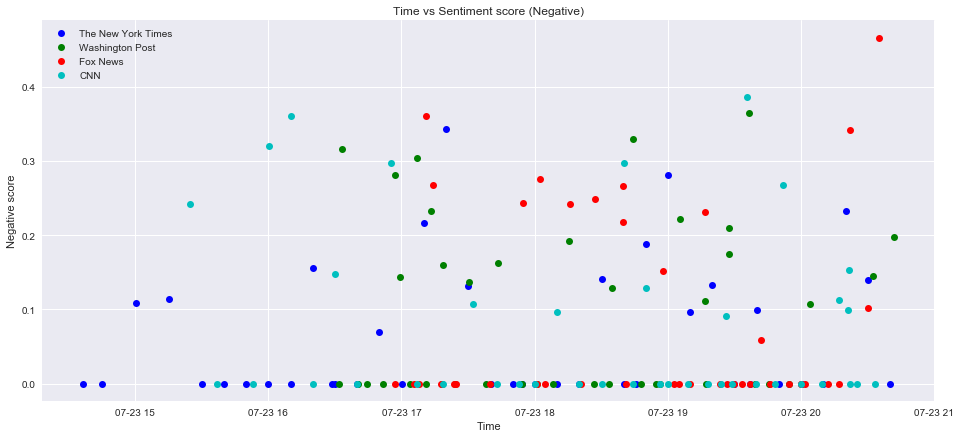

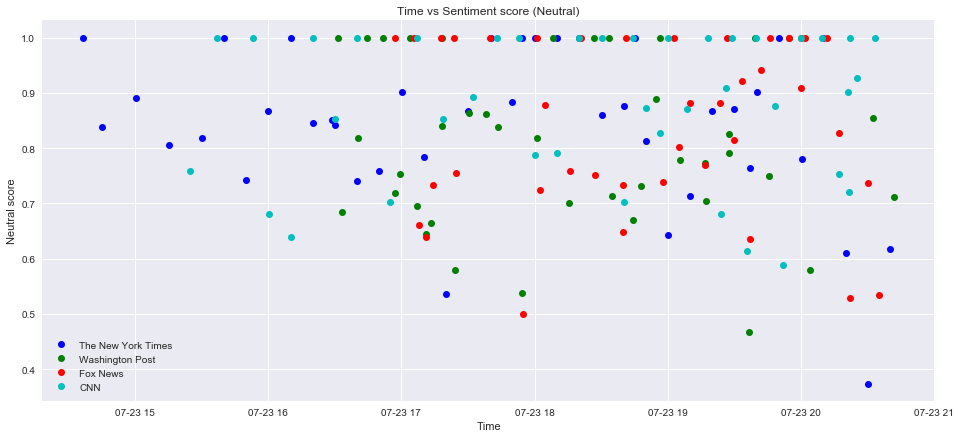

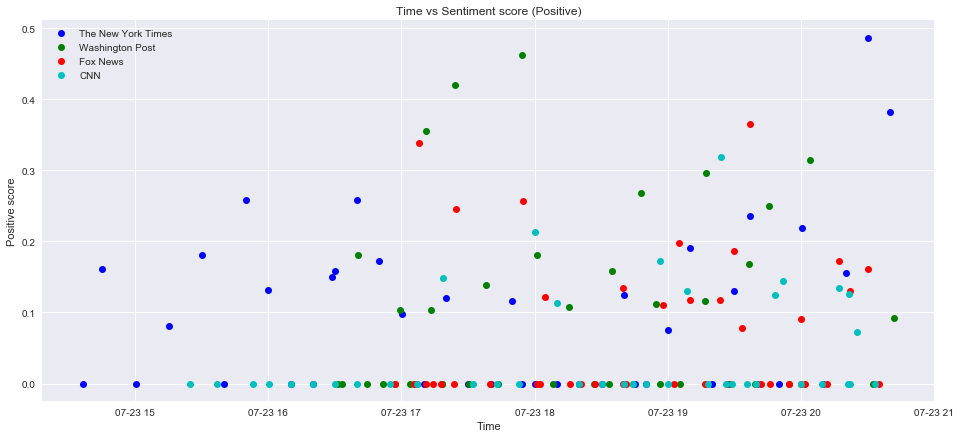

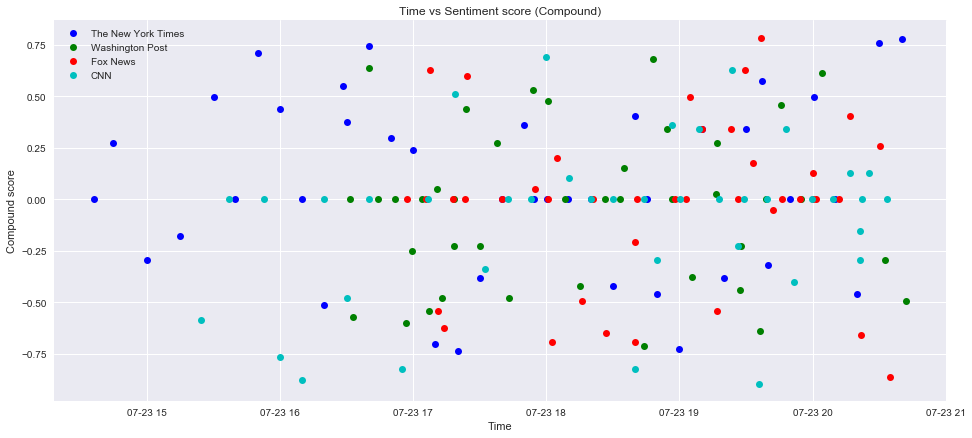

In [29]:
scores=['Negative', 'Neutral', 'Positive', 'Compound']
for score in scores:
    plot_time_scores(score)

In [30]:
news_outlets_sentements[['Date_time','Compound', 'News_outlet']].to_csv('news_outlets_Compound2.csv')

In [31]:
news_outlets_sentements.head()

,Date_time,Compound,Negative,Neutral,News_outlet,Positive,Source,Tweet,Tweet_number
0,2018-07-23 20:33:27+00:00,0.0000,0.000,1.000,CNN,0.000,"<a href=""http://www.socialflow.com"" rel=""nofol...",This week's blood Moon will be the longest tot...,1
1,2018-07-23 20:25:13+00:00,0.1280,0.000,0.927,CNN,0.073,"<a href=""http://www.socialflow.com"" rel=""nofol...",Migrant women waiting to be reunited with thei...,2
2,2018-07-23 20:22:08+00:00,0.0000,0.000,1.000,CNN,0.000,"<a href=""https://about.twitter.com/products/tw...","RT @TheLeadCNN: @jaketapper By the way, former...",3
3,2018-07-23 20:21:29+00:00,-0.1531,0.153,0.721,CNN,0.126,"<a href=""https://about.twitter.com/products/tw...",RT @TheLeadCNN: .@jaketapper: The President of...,4
4,2018-07-23 20:21:19+00:00,-0.2960,0.099,0.901,CNN,0.000,"<a href=""http://www.socialflow.com"" rel=""nofol...","Maria Butina, who is accused by US prosecutors...",5
